## <font color='darkblue'>Preface</font>
([article source](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)) It can be **more flexible to predict probabilities of an observation belonging to each class in a classification problem rather than predicting classes directly.**

This flexibility comes from the way that <font color='darkred'>**probabilities may be interpreted using different thresholds that allow the operator of the model to trade-off concerns in the errors made by the model, such as the number of false positives compared to the number of false negatives.**</font> This is required when using models where the cost of one error outweighs the cost of other types of errors.

Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are [**ROC Curves**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and [**Precision-Recall curves**](http://mlwiki.org/index.php/Precision_and_Recall#Precision.2FRecall_Curves). **In this tutorial, you will discover ROC Curves, Precision-Recall Curves, and when to use each to interpret the prediction of probabilities for binary classification problems.**

After completing this tutorial, you will know:
* **ROC Curves** summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
* **Precision-Recall curves** summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
* **ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.**


### <font color='darkgreen'>Tutorial Overview</font>
This tutorial is divided into 6 parts; they are:
1. <font size='3ptx'>[**Predicting Probabilities**](#sect1)</font>
2. <font size='3ptx'>[**What Are ROC Curves?**](#sect2)</font>
3. <font size='3ptx'>[**ROC Curves and AUC in Python**](#sect3)</font>
4. <font size='3ptx'>[**What Are Precision-Recall Curves?**](#sect4)</font>
5. <font size='3ptx'>[**Precision-Recall Curves and AUC in Python**](#sect5)</font>
6. <font size='3ptx'>[**When to Use ROC vs. Precision-Recall Curves?**](#sect6)</font>

<a id='sect1'></a>
## <font color='darkblue'>Predicting Probabilities</font>
In a classification problem, we may decide to predict the class values directly.

Alternately, **it can be more flexible to predict the probabilities for each class instead. The reason for this is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.**

For example, a default might be to use a threshold of 0.5, meaning that a probability in [0.0, 0.49] is a negative outcome (0) and a probability in [0.5, 1.0] is a positive outcome (1). This threshold can be adjusted to tune the behavior of the model for a specific problem. An example would be to reduce more of one or another type of error.

When making a prediction for a binary or two-class classification problem, there are two types of errors that we could make:
* **False Positive**. Predict an event when there was no event.
* **False Negative**. Predict no event when in fact there was an event.

**By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.**

For example, in a smog prediction system, we may be far more concerned with having low false negatives than low false positives. A false negative would mean not warning about a smog day when in fact it is a high smog day, leading to health issues in the public that are unable to take precautions. A false positive means the public would take precautionary measures when they didn’t need to.

A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.

<a id='sect2'></a>
## <font color='darkblue'>What Are ROC Curves?</font>
A useful tool when predicting the probability of a binary outcome is the [**Receiver Operating Characteristic curve**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), or ROC curve.
![1](images/1.png)
<br/>

It is **a plot of the false positive rate** (<font color='brown'>x-axis</font>) **versus the true positive rate** (<font color='brown'>y-axis</font>) **for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate**.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.
> True Positive Rate = True Positives / (True Positives + False Negatives)

The true positive rate is also referred to as <font color='darkblue'>**sensitivity**</font>:
> Sensitivity = True Positives / (True Positives + False Negatives)

The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives. It is also called the <font color='darkblue'>**false alarm rate**</font> as it summarizes how often a positive class is predicted when the actual outcome is negative.
> False Positive Rate = False Positives / (False Positives + True Negatives)


The false positive rate is also referred to as the inverted specificity where specificity is the total number of true negatives divided by the sum of the number of true negatives and false positives.
> Specificity = True Negatives / (True Negatives + False Positives)

Where:
> False Positive Rate = 1 - Specificity

The ROC curve is a useful tool for a few reasons:
* The curves of different models can be compared directly in general or for different thresholds.
* The area under the curve (AUC) can be used as a summary of the model skill.

The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate. To make this clear:
* Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
* Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

If you are confused, remember, when we predict a binary outcome, it is either a correct prediction (<font color='brown'>true positive</font>) or not (<font color='brown'>false positive</font>). There is a tension between these options, the same with true negative and false negative.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. **Generally, skilful models are represented by curves that bow up to the top left of the plot.**

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

**An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.**

<a id='sect3'></a>
## <font color='darkblue'>ROC Curves and AUC in Python</font>
We can plot a ROC curve for a model in Python using the [roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) scikit-learn function. The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds. First of all, let's prepare fake dataset:

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate 2 class dataset
X, y = make_classification(n_samples=5000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
trainX.shape

(4000, 20)

Then we define a Logistic model and start training:

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

Then we need to calculate some data used for ROC curve:

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.929


Finally, let's draw the ROC curve:

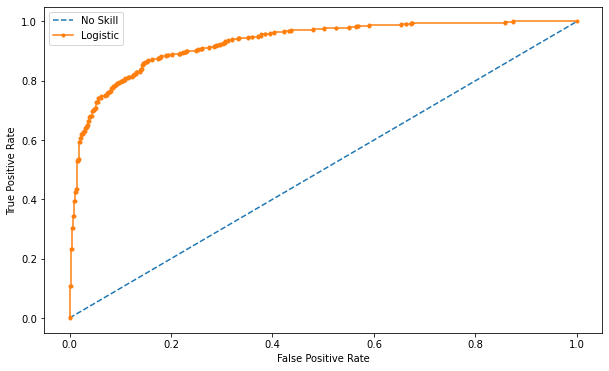

In [14]:
from matplotlib import pyplot

pyplot.rcParams['figure.figsize'] = [10, 6]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show();

<a id='sect4'></a>
## <font color='darkblue'>What Are Precision-Recall Curves?</font>
There are many ways to evaluate the skill of a prediction model. An approach in the related field of [**information retrieval**](https://en.wikipedia.org/wiki/Information_retrieval) (<font color='brown'>finding documents based on queries</font>) measures [**precision and recall**](https://en.wikipedia.org/wiki/Precision_and_recall).

These measures are also useful in applied machine learning for evaluating binary classification models.

**Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives**. It describes how good a model is at predicting the positive class. Precision is referred to as the **<font color='darkblue'>positive predictive value</font>**.
> Precision = True Positives / (True Positives + False Positives)

**Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives**. Recall is the same as <font color='darkblue'>**sensitivity**</font>.
> Recall = True Positives / (True Positives + False Negatives)

**Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes.** Specifically, there are many examples of no event (<font color='brown'>class 0</font>) and only a few examples of an event (<font color='brown'>class 1</font>).

The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high true negatives. **Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1.**

A precision-recall curve is a plot of the precision (<font color='brown'>y-axis</font>) and the recall (<font color='brown'>x-axis</font>) for different thresholds, much like the ROC curve:
![2](images/2.png)
<br/>
A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.
> While the baseline is fixed with ROC, the baseline of [precision-recall curve] is determined by the ratio of positives (P) and negatives (N) as y = P / (P + N). For instance, we have y = 0.5 for a balanced class distribution <br/><br/>
> **[- The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432)**

A model with perfect skill is depicted as a point at (1,1). A skilful model is represented by a curve that bows towards (1,1) above the flat line of no skill. There are also composite scores that attempt to summarize the precision and recall; two examples include:
* **F-Measure or F1 score:** that calculates the harmonic mean of the precision and recall (harmonic mean because the precision and recall are rates).
* **Area Under Curve:** like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve.

In terms of model selection, F-Measure summarizes model skill for a specific probability threshold (<font color='brown'>e.g. 0.5</font>), whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.

This makes precision-recall and a plot of precision vs. recall and summary measures useful tools for binary classification problems that have an imbalance in the observations for each class.

<a id='sect5'></a>
## <font color='darkblue'>Precision-Recall Curves in Python</font>
Precision and recall can be calculated in scikit-learn.

The precision and recall can be calculated for thresholds using the [precision_recall_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) function that takes the true output values and the probabilities for the positive class as output and returns the precision, recall and threshold values.

In [16]:
from sklearn.metrics import precision_recall_curve, f1_score, auc

yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.851 auc=0.929


Now let's draw the PR curve:

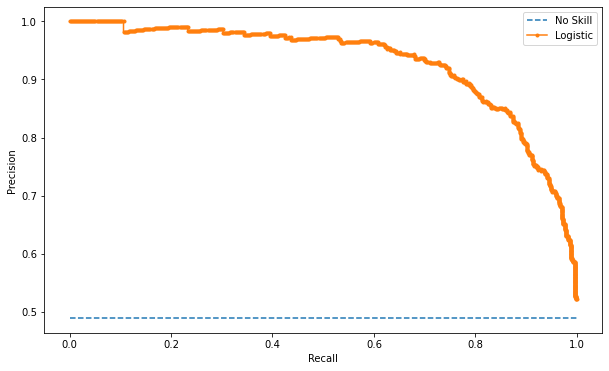

In [17]:
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

<a id='sect6'></a>
## <font color='darkblue'>When to Use ROC vs. Precision-Recall Curves?</font>
Generally, the use of ROC curves and precision-recall curves are as follows:
* ROC curves should be used when there are roughly equal numbers of observations for each class.
* Precision-Recall curves should be used when there is a moderate to large class imbalance.

The reason for this recommendation is that **<font color='darkred'>ROC curves present an optimistic picture of the model on datasets with a class imbalance.</font>**
> However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. […] Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution. <br/><br/>
> [— The Relationship Between Precision-Recall and ROC Curves, 2006.](https://dl.acm.org/citation.cfm?id=1143874)

Some go further and suggest that using **a ROC curve with an imbalanced dataset might be deceptive and lead to incorrect interpretations of the model skill.**
> the visual interpretability of ROC plots in the context of imbalanced datasets can be deceptive with respect to conclusions about the reliability of classification performance, owing to an intuitive but wrong interpretation of specificity. [Precision-recall curve] plots, on the other hand, can provide the viewer with an accurate prediction of future classification performance due to the fact that they evaluate the fraction of true positives among positive predictions <br/><br/>
> [— The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/)

The main reason for this optimistic picture is because of the use of true negatives in the False Positive Rate in the ROC Curve and the careful avoidance of this rate in the Precision-Recall curve.
> If the proportion of positive to negative instances changes in a test set, the ROC curves will not change. Metrics such as accuracy, precision, lift and F scores use values from both columns of the confusion matrix. As a class distribution changes these measures will change as well, even if the fundamental classifier performance does not. ROC graphs are based upon TP rate and FP rate, in which each dimension is a strict columnar ratio, so do not depend on class distributions. <br/><br/>
> [— ROC Graphs: Notes and Practical Considerations for Data Mining Researchers, 2003.](http://www.blogspot.udec.ugto.saedsayad.com/docs/ROC101.pdf)

We can make this concrete with a short example.

Below is the same ROC Curve example with a modified problem where there is **a ratio of about 100:1 ratio of class=0 to class=1 observations** (<font color='brown'>specifically Class0=985, Class1=15</font>).

In [18]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

Then let's train the model and draw the ROC curve:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


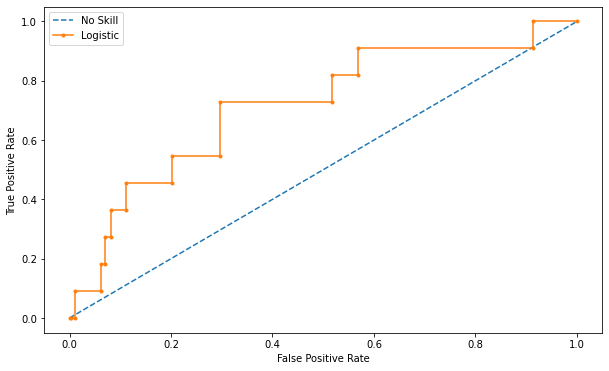

In [19]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Indeed, it has skill, <font color='darkred'>**but all of that skill is measured as making correct true negative predictions and there are a lot of negative predictions to make**</font>. If you review the predictions, you will see that the model predicts the majority class (class 0) in all cases on the test set. The score is very misleading.

In [20]:
from sklearn.metrics import classification_report

pred_y = lr_probs > 0.5
print(classification_report(testy, pred_y))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.00      0.00      0.00        11

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.96      0.98      0.97       500



c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can also repeat the test of the same model on the same dataset and calculate a precision-recall curve:

Logistic: f1=0.000 auc=0.054


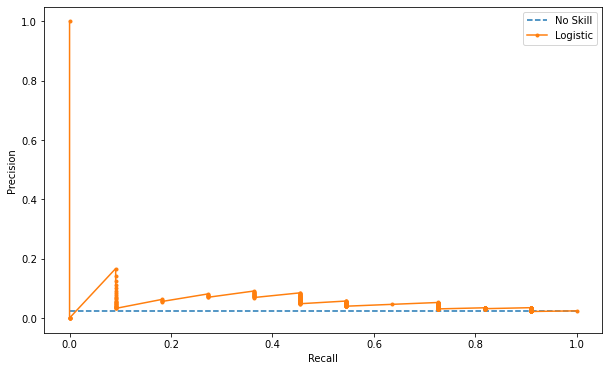

In [21]:
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

We can see that the model is penalized for predicting the majority class in all cases. The scores show that the model that looked good according to the ROC Curve is in fact barely skillful when considered using using precision and recall that focus on the positive class.

## <font color='darkblue'>Supplement</font>
* [深入介紹及比較ROC曲線及PR曲線](https://medium.com/nlp-tsupei/roc-pr-%E6%9B%B2%E7%B7%9A-f3faa2231b8c)